# 柱状图

柱状图适用场合是二维数据集（每个数据点包括两个值x和y），但只有一个维度需要比较。例如：年销售额就是二维数据，”年份”和”销售额”就是它的两个维度，但只需要比较”销售额”这一个维度。<br>
柱状图利用柱子的高度，反映数据的差异。肉眼对高度差异很敏感，辨识效果非常好。<br>
我们使用的是电影票房数据，数据的参考链接为http://58921.com/alltime <br>
我们随机从中选取了6个数据，并将电影的名字和总票房数作为实践数据。

经过前面的学习，我们知道绘制折线图使用plt.plot()方法，而绘制柱形图我们使用plt.bar()函数:<br>

In [ ]:
plt.bar(x,height,width,color)

先来了解一下函数的常用参数：<br>
代码参数<br>
x：记录x轴上的标签<br>
height：记录每个柱形的高度<br>
width：设置柱形的宽度<br>
color：设置柱形的颜色，传入颜色值的列表，例如：['blue','green','red']。

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import font_manager
a = ['流浪地球','疯狂的外星人','飞驰人生','大黄蜂','熊出没·原始时代','新喜剧之王']
b = [38.13,19.85,14.89,11.36,6.47,5.93]

my_font = font_manager.FontProperties(fname='/data/course_data/data_analysis/STSONG.TTF')
plt.figure(figsize=(20,8),dpi=80)

# 绘制柱状图
rects = plt.bar(a,b,width=0.3,color=['red','green','blue','cyan','yellow','gray'])
plt.xticks(a,fontproperties=my_font)
plt.yticks(range(0,41,5),range(0,41,5))

# 在条形图上加标注(水平居中)
for rect in rects:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, height+0.3, str(height),ha="center")
plt.show()

但是，细心的同学会注意到，我们将柱形的高度数据标注在了柱形的上方。没错，我们使用了plt.text( )函数为每个柱形标注高度数值。

In [ ]:
plt.text(x,y,s,ha,va)

函数中前两个参数分别为标注数据的坐标，x和y坐标，参数s记录标注的内容，参数ha和va分别用于设置水平和垂直方向的对齐方式。<br>
rects是plt.bar()的返回值，里面包含了每一个柱形为每个柱形添加数值标注需要逐个添加，所以我们设置了一个循环来完成这项操作。<br>

通过get_height()、get_x()、rect.get_width()等方法可以分别拿到柱形图的高度，左侧边的x值，柱子的宽度。然后，使用plt.text添加上文字，这样就可以清晰地看出每个柱形的高度了。

# 直方图

直方图一般用来描述等距数据，柱状图一般用来描述名称（类别）数据或顺序数据。直观上，直方图各个长条形是衔接在一起的，表示数据间的数学关系；条形图各长条形之间留有空隙，区分不同的类。

In [ ]:
plt.hist(data, bins, facecolor, edgecolor)

常用参数 <br>
data：绘图用到的数据 <br>
height：直方图的条形数目 <br>
bins：设置柱形的宽度 <br>
facecolor：矩形的填充颜色 <br>
edgecolor：条形的边框颜色 <br>

现有250部电影的时长，希望统计出这些电影时长的分布状态(比如时长为100分钟到120分钟电影的数量，出现的频率信息，你应该如何呈现这些数据？

In [4]:
# 电影时长数据
time = [131,  98, 125, 131, 124, 139, 131, 117, 128, 108, 135, 138, 131, 102, 107, 114,
        119, 128, 121, 142, 127, 130, 124, 101, 110, 116, 117, 110, 128, 128, 115,  99, 
        136, 126, 134,  95, 138, 117, 111,78, 132, 124, 113, 150, 110, 117,  86,  95, 144, 
        105, 126, 130,126, 130, 126, 116, 123, 106, 112, 138, 123,  86, 101,  99, 136,123,
        117, 119, 105, 137, 123, 128, 125, 104, 109, 134, 125, 127,105, 120, 107, 129, 116,
        108, 132, 103, 136, 118, 102, 120, 114,105, 115, 132, 145, 119, 121, 112, 139, 125,
        138, 109, 132, 134,156, 106, 117, 127, 144, 139, 139, 119, 140,  83, 110, 102,123,
        107, 143, 115, 136, 118, 139, 123, 112, 118, 125, 109, 119, 133,112, 114, 122, 109, 
        106, 123, 116, 131, 127, 115, 118, 112, 135,115, 146, 137, 116, 103, 144,  83, 123, 
        111, 110, 111, 100, 154,136, 100, 118, 119, 133, 134, 106, 129, 126, 110, 111, 109, 
        141,120, 117, 106, 149, 122, 122, 110, 118, 127, 121, 114, 125, 126,114, 140, 103, 
        130, 141, 117, 106, 114, 121, 114, 133, 137,  92,121, 112, 146,  97, 137, 105,  98, 
        117, 112,  81,  97, 139, 113,134, 106, 144, 110, 137, 137, 111, 104, 117, 100, 111,
        101, 110,105, 129, 137, 112, 120, 113, 133, 112,  83,  94, 146, 133, 101,131, 116, 
        111,  84, 137, 115, 122, 106, 144, 109, 123, 116, 111,111, 133, 150]

Text(0, 0.5, '电影的数据量')

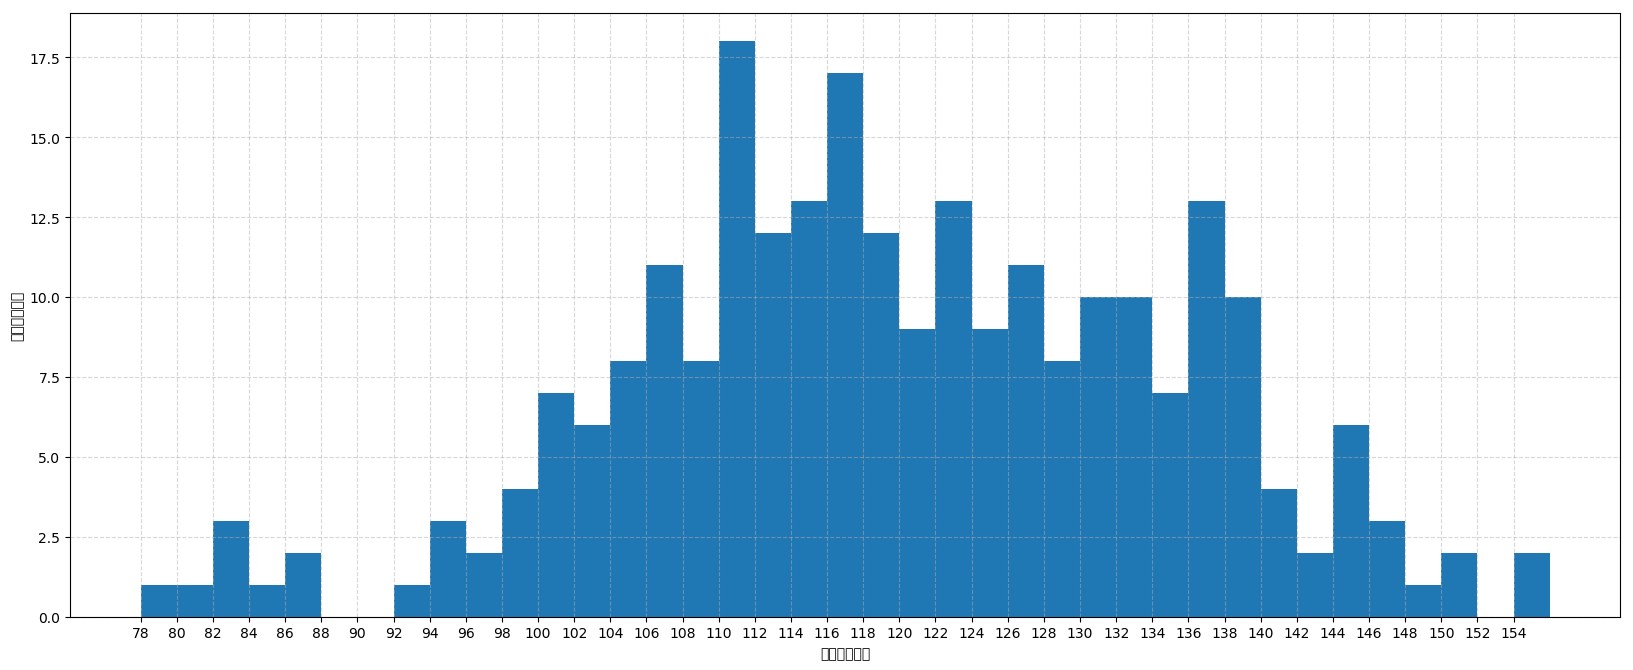

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import font_manager
time = [131,  98, 125, 131, 124, 139, 131, 117, 128, 108, 135, 138, 131, 102, 107, 114,
        119, 128, 121, 142, 127, 130, 124, 101, 110, 116, 117, 110, 128, 128, 115,  99, 
        136, 126, 134,  95, 138, 117, 111,78, 132, 124, 113, 150, 110, 117,  86,  95, 144, 
        105, 126, 130,126, 130, 126, 116, 123, 106, 112, 138, 123,  86, 101,  99, 136,123,
        117, 119, 105, 137, 123, 128, 125, 104, 109, 134, 125, 127,105, 120, 107, 129, 116,
        108, 132, 103, 136, 118, 102, 120, 114,105, 115, 132, 145, 119, 121, 112, 139, 125,
        138, 109, 132, 134,156, 106, 117, 127, 144, 139, 139, 119, 140,  83, 110, 102,123,
        107, 143, 115, 136, 118, 139, 123, 112, 118, 125, 109, 119, 133,112, 114, 122, 109, 
        106, 123, 116, 131, 127, 115, 118, 112, 135,115, 146, 137, 116, 103, 144,  83, 123, 
        111, 110, 111, 100, 154,136, 100, 118, 119, 133, 134, 106, 129, 126, 110, 111, 109, 
        141,120, 117, 106, 149, 122, 122, 110, 118, 127, 121, 114, 125, 126,114, 140, 103, 
        130, 141, 117, 106, 114, 121, 114, 133, 137,  92,121, 112, 146,  97, 137, 105,  98, 
        117, 112,  81,  97, 139, 113,134, 106, 144, 110, 137, 137, 111, 104, 117, 100, 111,
        101, 110,105, 129, 137, 112, 120, 113, 133, 112,  83,  94, 146, 133, 101,131, 116, 
        111,  84, 137, 115, 122, 106, 144, 109, 123, 116, 111,111, 133, 150]
# my_font = font_manager.FontProperties(fname='/data/course_data/data_analysis/STSONG.TTF',size=10)
# 2）创建画布
plt.figure(figsize=(20, 8), dpi=100)

# 3）绘制直方图
# 设置组距
distance = 2
# 计算组数
group_num = int((max(time) - min(time)) / distance)
# 绘制直方图
plt.hist(time, bins=group_num)

# 修改x轴刻度显示
plt.xticks(range(min(time), max(time))[::2])

# 添加网格显示
plt.grid(linestyle="--", alpha=0.5)

# 添加x, y轴描述信息
plt.xlabel("电影时长大小")#,fontproperties=my_font)
plt.ylabel("电影的数据量")#,fontproperties=my_font)

# 4）显示图像

那么直方图和柱形图究竟有什么区别呢。<br>
第一，柱形图中用柱形的高度表示各类别的数值，横轴表示类别，宽度是固定的；而直方图是用矩形的高度表示每一组的频数或频率，宽度则表示各组的组距，因此其高度与宽度均有意义。<br>
第二，直方图主要用于展示连续型数值型数据，所以各矩形通常是连续排列的；而柱形图主要用于展示分类型数据，常常是分开排列的。<br>

# 散点图

散点图是判断变量之间是否存在数量关联趋势,展示离群点。每个点的坐标位置由变量的值决定，并由一组不连接的点完成，用于观察两种变量的相关性。例如，身高—体重、温度—维度。<br>
绘制直方图使用plt.scatter()函数：<br>

In [ ]:
plt.scatter(x,y,s,c,marker,alpha,linewidths)

先来了解一下函数的常用参数：<br>
常用参数<br>
x,y：数组<br>
s：散点图中点的大小，可选<br>
c：散点图中点的颜色，可选<br>
marker：散点图的形状，可选<br>
alpha：表示透明度，在 0~1 取值，可选<br>
linewidths：表示线条粗细，可选

接下来我们绘制出身高和体重的散点图，观察两种变量的相关性。

In [ ]:
%matplotlib inline
import pandas as pd
from matplotlib import pyplot as plt
df = pd.read_csv('/data/course_data/data_analysis/height_weight.csv')
# 设置图形大小
plt.figure(figsize=(20,8),dpi=80)
# 使用scatter绘制散点图
plt.scatter(df['height'],df['weight'],alpha=0.5,c='red')
plt.show()

# 饼图

饼图是展示 分类数据的占比情况，就是反映某个部分占整体的比重，比如贫穷人口占总人口的百分比。<br>
饼图的整个圆代表总数据，各个扇形表示每项数据，我们可以根据扇形的角度清楚地看出每个扇形占总数据的比例。

In [ ]:
plt.pie(x, labels, autopct, shadow, startangle)

常用参数<br>
x：绘制用到的数据<br>
Tlabels：用于设置饼图中每一个扇形外侧的显示说明文字<br>
autopct：设置饼图内百分比数据，可以使用format字符串或者format function，例如’%.1f%%’指小数点后保留1位小数<br>
shadow：表示是否在饼图下面画阴影，默认值：False，即不画阴影<br>
Tstartangle：设置起始绘制角度，默认图是从x轴正方向逆时针画起，如果设定startangle=90，则从y轴正方向画起

In [ ]:
%matplotlib inline
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import font_manager
my_font = font_manager.FontProperties(fname='/data/course_data/data_analysis/STSONG.TTF',size=10)
df = pd.read_excel('/data/course_data/data_analysis/lagou.xlsx')
plt.figure(figsize = (10,8))
num = df.groupby('学历').size()
# 绘制饼图
patches, l_text, p_text = plt.pie(num,labels = num.index, autopct='%.1f%%',shadow=False,startangle=90)
for t in l_text: 
    t.set_fontproperties(my_font)
plt.show()

这样我们就绘制出了一个完整的饼图，接下来，我们分析一下代码逻辑。<br>
df.groupby('学历').size()按照类型变量学历对原数据分组，使用groupby函数，然后计算每组数据的数据量，使用size()函数，将输出的数据记录为num。<br>
plt.pie()会有三个返回值<br>
patches: matplotlib.patches.Wedge列表(扇形实例)<br>
l_text：label matplotlib.text.Text列表(标签实例)<br>
p_text：label matplotlib.text.Text列表(百分比标签实例)<br>

所以，在每一个扇形外侧显示中文的时候，需要获取到每一个标签实例，然后通过set_fontproperties()方法设置自定义字体。